In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_digitization(analog_signal, sampling_rate, quantization_levels):
    """
    analog_signal: fungsi kontinu
    sampling_rate: jumlah sampel
    quantization_levels: jumlah level kuantisasi
    """

    # 1. Buat domain kontinu
    x_cont = np.linspace(0, 2*np.pi, 1000)
    y_cont = analog_signal(x_cont)

    # 2. Sampling
    x_sampled = np.linspace(0, 2*np.pi, sampling_rate)
    y_sampled = analog_signal(x_sampled)

    # 3. Quantization
    y_min = np.min(y_sampled)
    y_max = np.max(y_sampled)

    # Normalisasi
    y_normalized = (y_sampled - y_min) / (y_max - y_min)

    # Kuantisasi
    y_quantized = np.round(y_normalized * (quantization_levels - 1))

    # Kembalikan ke skala asli
    y_quantized = y_quantized / (quantization_levels - 1)
    y_quantized = y_quantized * (y_max - y_min) + y_min

    # 4. Visualisasi
    plt.figure(figsize=(10,6))

    plt.plot(x_cont, y_cont, label="Sinyal Analog (Kontinu)")
    plt.scatter(x_sampled, y_sampled, color='red', label="Sampling")
    plt.step(x_sampled, y_quantized, where='mid', color='green', label="Setelah Quantization")

    plt.legend()
    plt.title("Simulasi Digitalisasi Sinyal")
    plt.show()

    return x_sampled, y_quantized

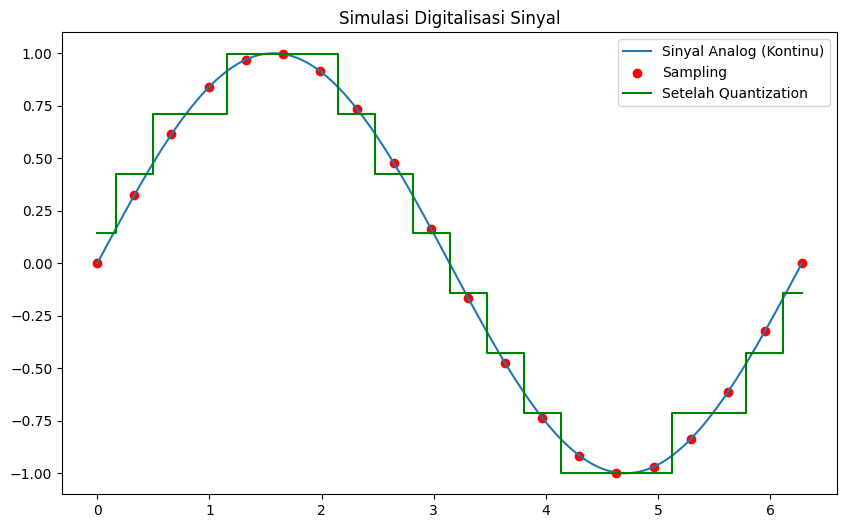

(array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
        1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
        3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
        4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531]),
 array([ 0.14236921,  0.42710764,  0.71184607,  0.71184607,  0.99658449,
         0.99658449,  0.99658449,  0.71184607,  0.42710764,  0.14236921,
        -0.14236921, -0.42710764, -0.71184607, -0.99658449, -0.99658449,
        -0.99658449, -0.71184607, -0.71184607, -0.42710764, -0.14236921]))

In [3]:
simulate_digitization(np.sin, sampling_rate=20, quantization_levels=8)